In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_str = "2 2 4 6 4 5 2 3 1 2 0 4 3 3 3 3 4 2 7 2 4 3 3 3 4 3 7 5 3 1 7 6 4 6 5 2 4 7 2 2 6 2 4 5 4 5 1 3 2 3"

In [3]:
data_raw =[float(d) for d in data_str.split()]

In [4]:
data = pd.DataFrame(data_raw)

In [5]:
data.describe()

,0
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


In [6]:
data[0].value_counts(sort=True)

3.0    12
2.0    11
4.0    10
5.0     5
7.0     4
6.0     4
1.0     3
0.0     1
Name: 0, dtype: int64

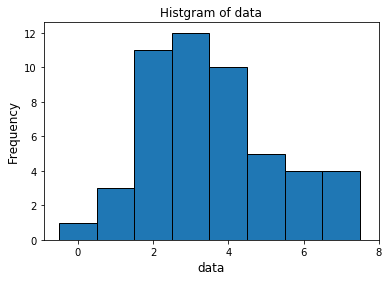

In [7]:
plt.hist(data[0], bins=np.arange(-0.5, 8.5, 1.0), ec="black")
plt.xlabel('data', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histgram of data', fontsize=12)
plt.xticks([2*x for x in range(5)])
plt.show()

## Poisson distribution
$$f(X|\lambda) = \frac{\lambda ^{X}}{X!}e^{-\lambda}$$

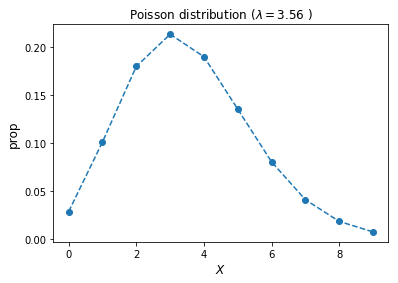

In [15]:
from scipy import stats
X = np.arange(0, 10)
prob = pd.Series(stats.poisson.pmf(X, 3.56), index=X)
plt.plot(prob , 'o--')
plt.xlabel('$X$', fontsize=12)
plt.ylabel('prop', fontsize=12)
plt.title("Poisson distribution ($\lambda=3.56$ )")
plt.show()

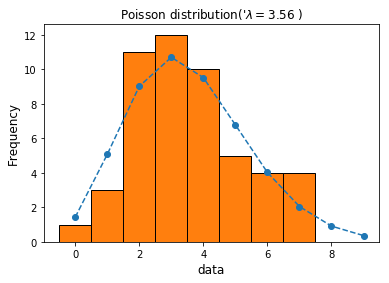

In [9]:
plt.plot(prob * len(data[0]), 'o--')
plt.hist(data[0], bins=np.arange(-0.5, 8.5, 1.0), ec="black")
plt.xlabel('data', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Poisson distribution('$\lambda=3.56$ )")
plt.show()

In [27]:
x = np.arange(2.0, 5.1, 0.01)
y = [sum(stats.poisson.logpmf(data[0], _x)) for _x in x]
varlam = pd.Series(y, index=x)

In [32]:
lam = varlam.argmax()
lam

3.5599999999999667

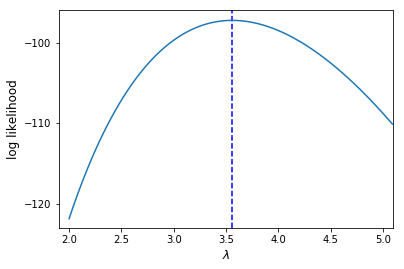

In [29]:
plt.plot(varlam, '-')
plt.xticks([n for n in np.arange(2.0, 5.5, 0.5)])
plt.yticks([-120, -110, -100])
plt.xlim([1.9,5.1])
plt.ylim([-123, -96])
plt.vlines([varlam.argmax()],-125, -95,  "blue", linestyles='dashed') 
plt.xlabel("$\lambda$", fontsize=12,)
plt.ylabel("log likelihood", fontsize=12)
plt.show()

Likelihood
$$
\begin{eqnarray}
L(x_{1}, x_{2}, \cdots, x_{n}| \lambda) &=& \prod_{i=1}^{n}f(x_{i}|\lambda) \\
&=& \prod_{i=1}^{n}\frac{\lambda ^{x_{i}}}{x_{i}!}e^{-\lambda} \\
&=& \lambda^{\sum_{i=1}^{n}x_{i}} \frac{1}{\prod_{i=1}^{n}x_{i}!} e^{-n\lambda}
\end{eqnarray}
$$

Log likelihood
$$
\begin{eqnarray}
l(x_{1}, x_{2}, \cdots, x_{n}|\lambda) &=& \log L(x_{1}, x_{2}, \cdots, x_{n}| \lambda) \\
&=& \log f(x_{1}, x_{2}, \cdots, x_{n}| \lambda)\\
&=& {\sum_{i=1}^{n}x_{i}}\log \lambda + \frac{1}{\prod_{i=1}^{n}x_{i}!} -n\lambda
\end{eqnarray}
$$

$$
\begin{eqnarray}
\frac{\partial l}{\partial \lambda} = 0 &\Leftrightarrow& \sum_{i=1}^{n}x_{i}\frac{1}{\lambda} - n=0 \\
&\Leftrightarrow& \lambda = \frac{1}{n}\sum_{i=1}^{n}x_{i}
\end{eqnarray}
$$

In [19]:
data[0].sum()/data[0].count()

3.5600000000000001

In [33]:
lam

3.5599999999999667